In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv("stats.csv")

In [44]:
df.shape

(735, 32)

In [ ]:
#Values are already in terms of Per Game
df.columns

Index(['Rk', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Awards', 'Player-additional'],
      dtype='object')

In [34]:
df.isna().sum()

Rk                     0
Player                 0
Age                    0
Team                   0
Pos                    0
G                      0
GS                     0
MP                     0
FG                     0
FGA                    0
FG%                    8
3P                     0
3PA                    0
3P%                   46
2P                     0
2PA                    0
2P%                   13
eFG%                   8
FT                     0
FTA                    0
FT%                   59
ORB                    0
DRB                    0
TRB                    0
AST                    0
STL                    0
BLK                    0
TOV                    0
PF                     0
PTS                    0
Awards               679
Player-additional      0
dtype: int64

In [42]:
#Fill in NA values with 0
df["2P%"] = df["2P%"].fillna(0)
df["3P%"] = df["3P%"].fillna(0)
df["FT%"] = df["FT%"].fillna(0)
df["eFG%"] = df["eFG%"].fillna(0)
df["FG%"] = df["FG%"].fillna(0)

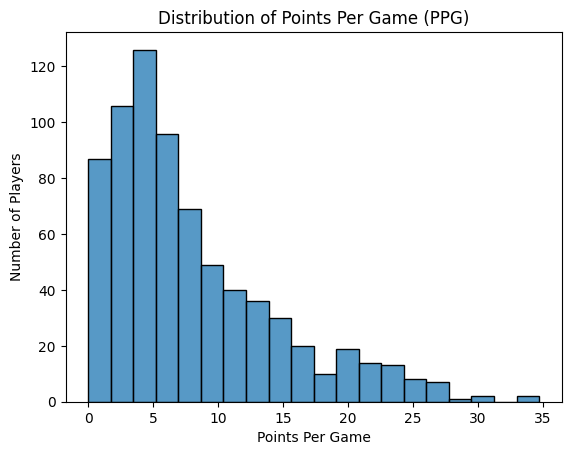

In [47]:
sns.histplot(data=df, x="PTS", bins=20, kde=False)
plt.title("Distribution of Points Per Game (PPG)")
plt.xlabel("Points Per Game")
plt.ylabel("Number of Players")
plt.show()

The histogram shows that most players score between **0-15 points per game**, showing a right-skewed distribution.

Only a small amount of players scored about 25 points, which underscores how rare an elite scorer is.

<Axes: xlabel='Pos', ylabel='PTS'>

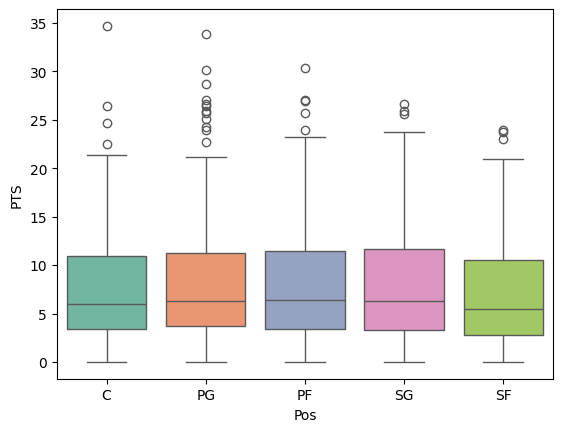

In [51]:
sns.boxplot(data=df, x="Pos", y="PTS", hue="Pos", palette="Set2")

In [54]:
medians = df.groupby("Pos")["PTS"].median()
medians

Pos
C     6.00
PF    6.40
PG    6.30
SF    5.45
SG    6.30
Name: PTS, dtype: float64

All the medians are similar, which is a little unexpected. Many players in the dataset played very few minutes, which might change the results. I will filter only players who played more than 10 minutes per game to create a better view of scoring roles.

In [69]:
core_players = df[(df["MP"] >= 20) & (df["G"] >= 40)]

<Axes: xlabel='Pos', ylabel='PTS'>

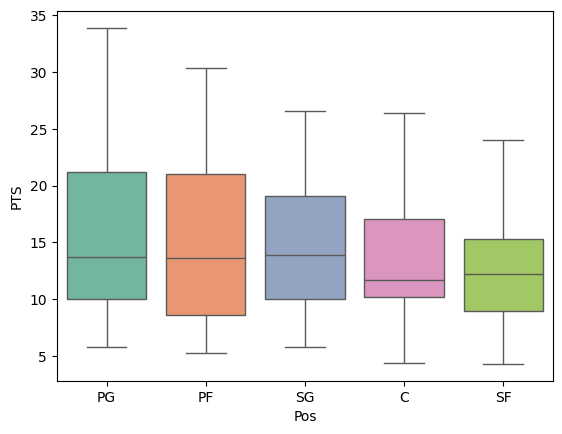

In [70]:
sns.boxplot(data=core_players, x="Pos", y="PTS", hue="Pos", palette="Set2")

In [68]:
core_players.groupby("Pos")["PTS"].median()

Pos
C     13.90
PF    18.15
PG    18.55
SF    14.70
SG    17.80
Name: PTS, dtype: float64

- After filtering, it is easier to see that PG and PF have the highest median PPG. 
- Centers (C) have the lowest median scoring, which suggests that their role may be catered more to rebounding and defensive work.
- Points Guards (PG) have the highest variability, suggesting a range between traditional passing point guards and high volume scorers. 

Text(0.5, 1.0, '[PPG vs MP] r = (0.8869917682195649)')

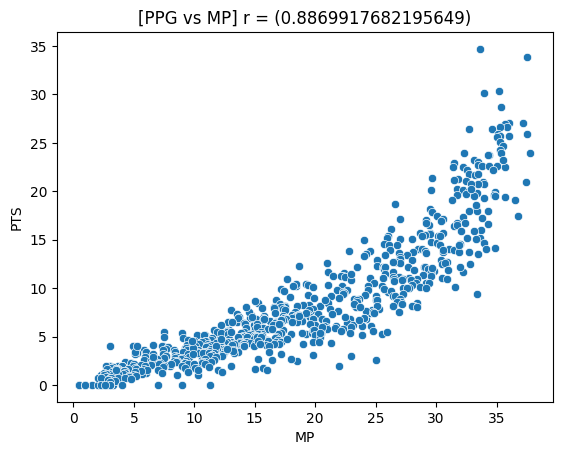

In [86]:
sns.scatterplot(data=df, x="MP", y="PTS")
x=df["MP"]
y=df["PTS"]
r=x.corr(y)
plt.title("[PPG vs MP] r = (" + str(r) + ")")

- There appears to be a strong, linear, and positive correlation between PPG and minutes played. This is not surprising as it makes sense that the longer a player is in a game the more oppurtunities they have to score.

In [134]:
correlation_matrix = df.corr(numeric_only=True)

<Axes: >

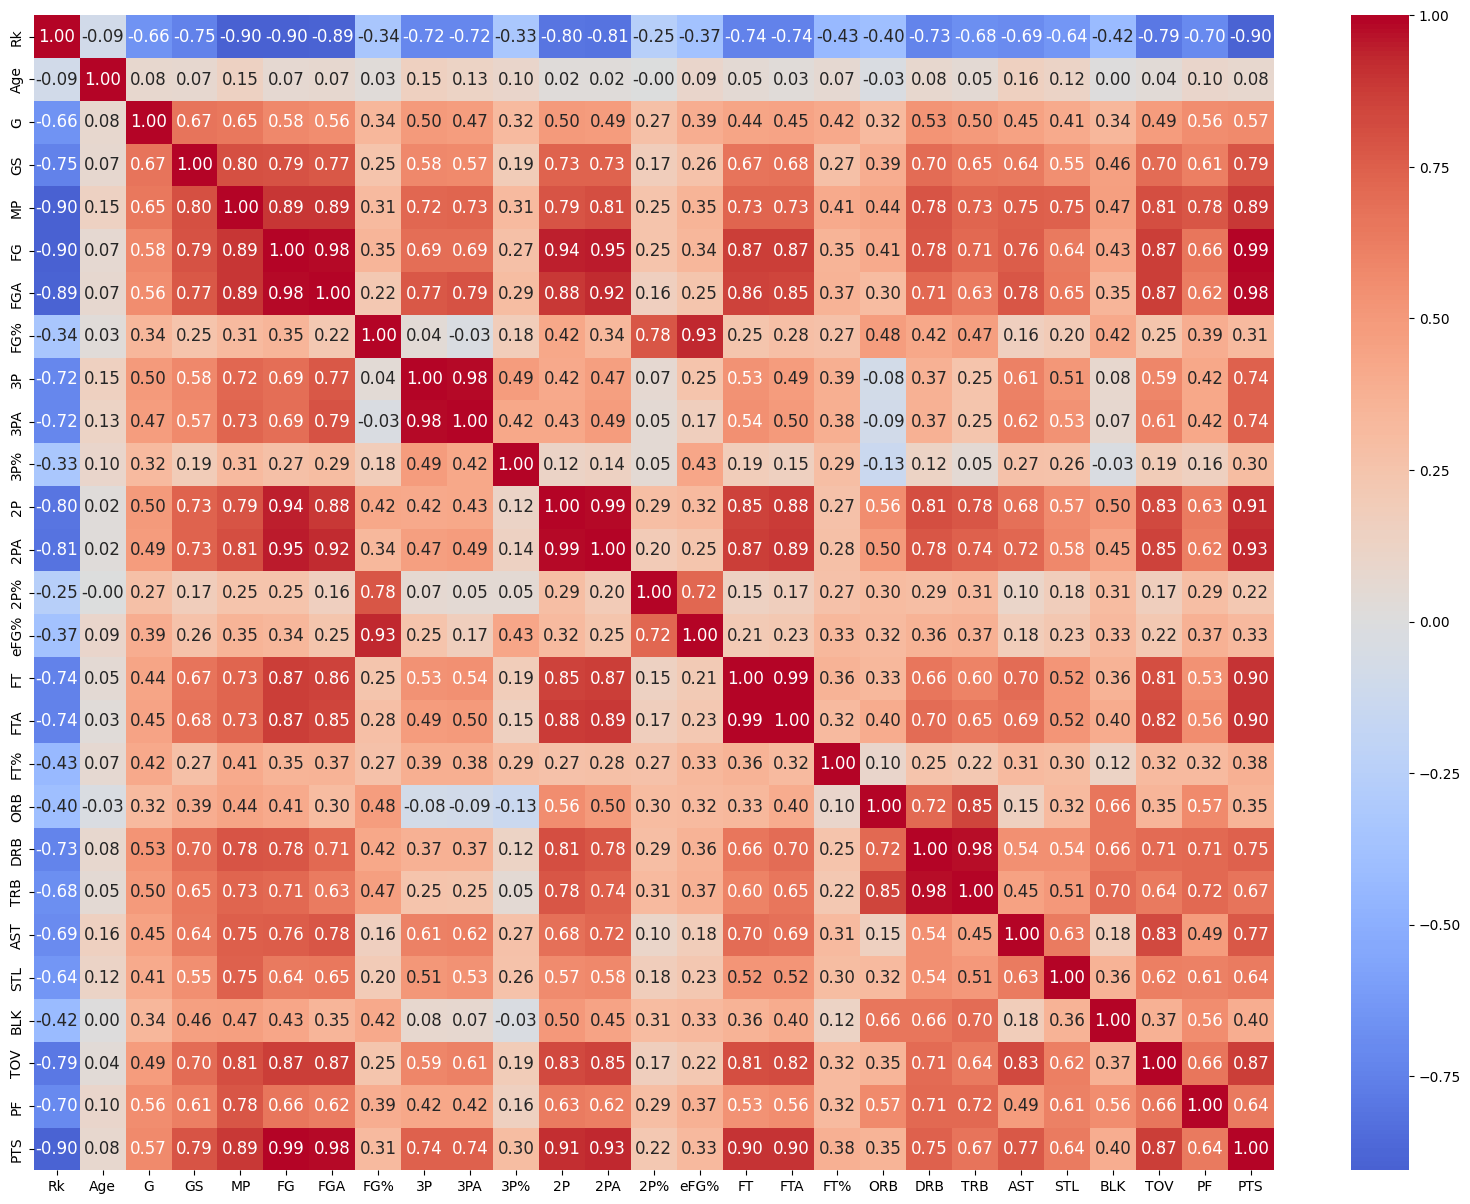

In [141]:
plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f", annot_kws={"size": 12})

- MP, FGA, 2PA, FTA all have high correlations with points per game, which is not that surprising. To score more, a player needs to attempt more shots and play more minutes. 
- Rebounds had a low correlation with scoring, reinforcing the idea that they represent different roles/skill sets. (Bigs can be expected to rebound more and score less, while guards and wing players can be expected to score more and rebound less).
- Assists were also moderately correlated with PPG, which could indicate that valuable scorers also are valuable team players.

Text(0.5, 1.0, '[PPG vs AGE] r = (0.08039013965389571)')

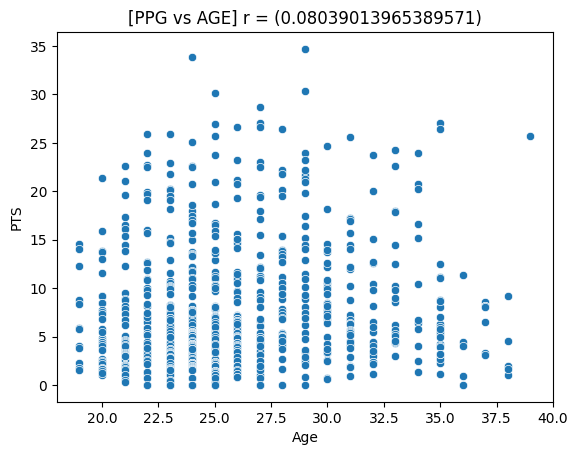

In [142]:
sns.scatterplot(data=df, x="Age", y="PTS")
x=df["Age"]
y=df["PTS"]
r=x.corr(y)
plt.title("[PPG vs AGE] r = (" + str(r) + ")")

<Axes: xlabel='Age'>

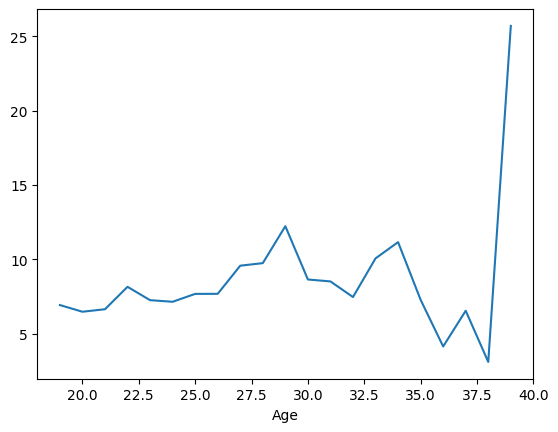

In [149]:
df.groupby('Age')['PTS'].mean().plot()

- With a correlation of around **0.08**, this low value suggests that scoring output is not strongly influenced by age. Other factors such as role, playing time, and position are likely more impactful to scoring. 
- From the lineplot it appears that around age **28-30** is when most players peak in scoring output. This likely be caused by a blance of physical prime and experience for players in that age group.
- The spike in scoring averages from ages **37.5 to 40** seems to be an anomaly caused by a small sample size. It is likely influenced by outliers like **LeBron James**, who is still an elite scorer despite his age.